<a href="https://colab.research.google.com/github/olmagra/Alzheimer-s-Disease-and-Healthy-Aging-Data/blob/main/AlzheimerDiseaseHealthyAgingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2 | Alzheimer's Disease and Healthy Aging Data**

Este data set es diferente al que había elegido inicialmente, pues se generó un error al subir la data probablemente por la gran cantidad de datos que tiene.

https://www.kaggle.com/datasets/utkarshx27/alzheimers-disease-and-healthy-aging-data

**Descripción del data set:**
Este conjunto de datos contiene datos sobre la enfermedad de Alzheimer y el envejecimiento saludable (2015-2021). La enfermedad de Alzheimer es un trastorno cerebral que destruye lentamente la memoria y las habilidades de pensamiento y, eventualmente, la capacidad de realizar las tareas más simples. En la mayoría de las personas con la enfermedad, aquellas con síntomas de aparición tardía aparecen por primera vez a mediados de los 60 años.
Este conjunto de datos contiene datos de BRFSS. El Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS) es el principal sistema de encuestas telefónicas relacionadas con la salud del país que recopila datos estatales sobre los residentes de EE. UU. con respecto a sus comportamientos de riesgo relacionados con la salud, condiciones de salud crónicas y uso de servicios preventivos.

In [225]:
# Importar las bibliotecas necesarias:
import pandas as pd
import numpy as np

#=> Código tomado de notas de clase y lecciones Coding Dojo
import matplotlib.pyplot as plt #Importar librería para gráficos Matplotlib
import seaborn as sns #Importar librería para gráficos Seaborn

# **PASO 0: CARGAR LOS DATOS**

In [226]:
#=> Código tomado de notas de clase y lecciones
#Activar Google Drive para poder cargar archivos de allí
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
# => Código tomado de notas de clase y ejercicios
#Cargo el archivo de datos en Drive (código tomado de notas de clase y ejercicios)
#Creo el DataFrame con el archivo de Excel cargado:
df = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df.head(3)

<ipython-input-227-e85187bb7ebd>:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,NaN,2021,2021,WEST,West,BRFSS,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,NaN,...,Q01,NaN,9004,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
1,NaN,2021,2021,NRE,Northeast,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,NaN,...,Q02,NaN,9001,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
2,NaN,2021,2021,MDW,Midwest,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,9002,AGE,5064,RACE,BLK,NaN,NaN,NaN


# **PASO 1: EXPLORAR LOS DATOS**

In [228]:
df.info() # Información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       0 non-null       float64
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             250937 non-null  object 
 11  DataValueTypeID             250937 non-null  object 
 12  Data_Value_Type             250937 non-null  object 
 13  Data_Value    

In [229]:
df.shape # Identificar cuántas registros y cuántas columnas tiene el data set

(250937, 39)

In [230]:
df.describe() #Principales indicadores estadísticos del data set

,RowId,YearStart,YearEnd,Response,Data_Value,Data_Value_Alt,Sample_Size,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID3,StratificationID3,Report
count,0.0,250937.000000,250937.000000,0.0,169302.000000,169302.000000,0.0,0.0,0.0,0.0,250937.000000,0.0,0.0,0.0
mean,NaN,2017.940933,2018.169716,NaN,37.328349,37.328349,NaN,NaN,NaN,NaN,793.866437,NaN,NaN,NaN
std,NaN,2.031564,2.081039,NaN,25.213181,25.213181,NaN,NaN,NaN,NaN,2502.174327,NaN,NaN,NaN
min,NaN,2015.000000,2015.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,2016.000000,2016.000000,NaN,15.700000,15.700000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN
50%,NaN,2018.000000,2018.000000,NaN,32.300000,32.300000,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN
75%,NaN,2020.000000,2020.000000,NaN,56.000000,56.000000,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN
max,NaN,2021.000000,2021.000000,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,9004.000000,NaN,NaN,NaN


In [231]:
df.nunique() # Calcular el número de valores únicos por columna

RowId                            0
YearStart                        7
YearEnd                          7
LocationAbbr                    59
LocationDesc                    59
Datasource                       1
Class                            7
Topic                           39
Question                        39
Response                         0
Data_Value_Unit                  2
DataValueTypeID                  2
Data_Value_Type                  2
Data_Value                    1000
Data_Value_Alt                1000
Data_Value_Footnote_Symbol       5
Data_Value_Footnote              5
Low_Confidence_Limit          1976
High_Confidence_Limit         1967
Sample_Size                      0
StratificationCategory1          1
Stratification1                  3
StratificationCategory2          2
Stratification2                  7
StratificationCategory3          0
Stratification3                  0
Geolocation                     54
ClassID                          7
TopicID             

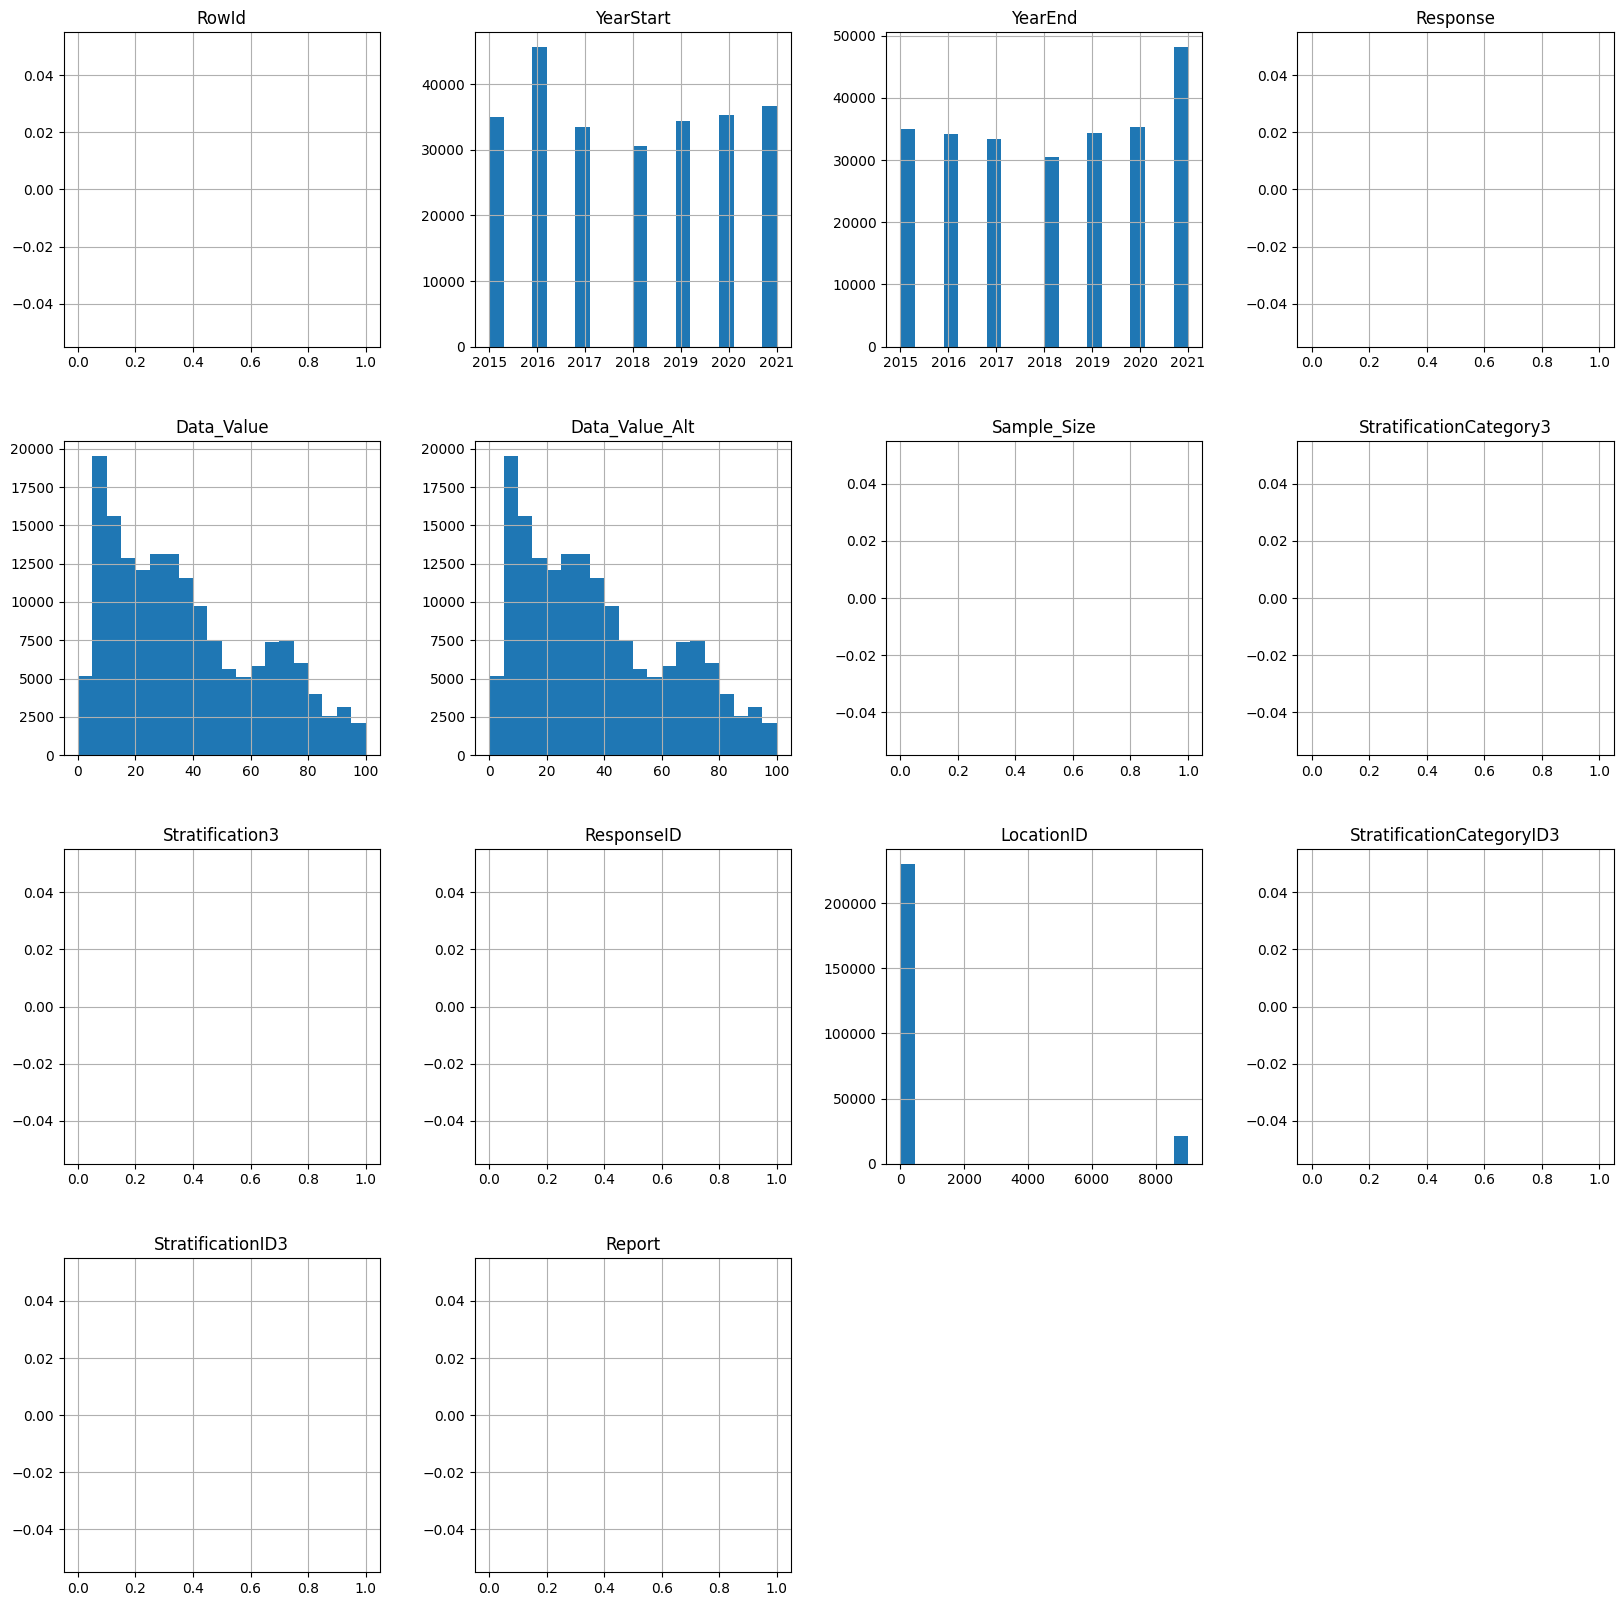

In [232]:
#=> Código tomado de https://www.kaggle.com/code/harshghadiya/clustering-on-wine-quality-3-different-clusters
# Visualizar los datos de cada variables
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

<ipython-input-233-f4c12090a8af>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


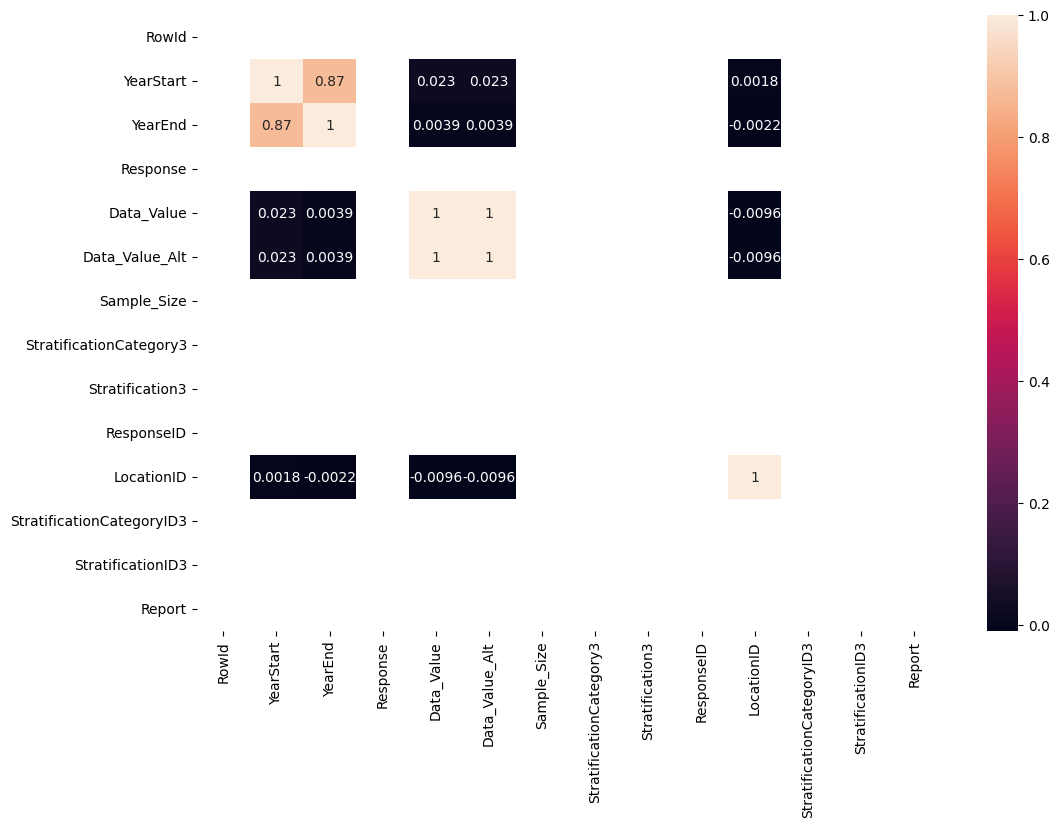

In [233]:
# Mapa de color para ver las correlaciones:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), annot=True)
plt.show();

# **PASO 2: LIMPIAR Y TRATAR LOS DATOS**

In [234]:
df.isnull().sum() #Identificar si hay nulos

RowId                         250937
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Response                      250937
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     81635
Data_Value_Alt                 81635
Data_Value_Footnote_Symbol    151823
Data_Value_Footnote           151823
Low_Confidence_Limit           81785
High_Confidence_Limit          81785
Sample_Size                   250937
StratificationCategory1            0
Stratification1                    0
StratificationCategory2        32376
Stratification2                32376
StratificationCategory3       250937
Stratification3               250937
Geolocation                    26709
C

In [235]:
df.duplicated().sum() #Cuenta los duplicados: No hay!

0

In [236]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'LocationAbbr'
df['LocationAbbr'].value_counts()

US      5376
WEST    5370
NRE     5346
MDW     5343
OR      5299
SOU     5274
NY      5271
UT      4714
OH      4666
HI      4626
MD      4616
GA      4539
MI      4493
TN      4446
TX      4431
MS      4381
ME      4373
WV      4318
WI      4313
NV      4308
VA      4274
AL      4271
NM      4265
KY      4255
DC      4249
PA      4236
SC      4231
OK      4227
AK      4223
NJ      4200
MO      4179
IN      4176
SD      4174
IL      4165
MN      4161
LA      4158
NE      4155
ID      4150
CT      4149
RI      4146
ND      4142
KS      4116
IA      4108
WY      4103
AR      4102
NC      4090
DE      4090
CA      4084
AZ      4074
VT      4004
CO      3966
MA      3896
WA      3864
MT      3840
NH      3776
FL      3741
PR      3239
GU      3131
VI      1024
Name: LocationAbbr, dtype: int64

In [237]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'LocationDesc'
df['LocationDesc'].value_counts()

United States, DC & Territories    5376
West                               5370
Northeast                          5346
Midwest                            5343
Oregon                             5299
South                              5274
New York                           5271
Utah                               4714
Ohio                               4666
Hawaii                             4626
Maryland                           4616
Georgia                            4539
Michigan                           4493
Tennessee                          4446
Texas                              4431
Mississippi                        4381
Maine                              4373
West Virginia                      4318
Wisconsin                          4313
Nevada                             4308
Virginia                           4274
Alabama                            4271
New Mexico                         4265
Kentucky                           4255
District of Columbia               4249


In [238]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Datasource'
df['Datasource'].value_counts()

BRFSS    250937
Name: Datasource, dtype: int64

In [239]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Class'
df['Class'].value_counts()

Overall Health                         84091
Screenings and Vaccines                52297
Nutrition/Physical Activity/Obesity    30376
Caregiving                             24427
Cognitive Decline                      21015
Mental Health                          19366
Smoking and Alcohol Use                19365
Name: Class, dtype: int64

In [240]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Topic'
df['Topic'].value_counts()

Influenza vaccine within past year                                                                        9683
Frequent mental distress                                                                                  9683
Physically unhealthy days (mean number of days)                                                           9683
No leisure-time physical activity within past month                                                       9683
Obesity                                                                                                   9683
Lifetime diagnosis of depression                                                                          9683
Current smoking                                                                                           9683
Self-rated health (fair to poor health)                                                                   9682
Self-rated health (good to excellent health)                                                              9682
B

In [241]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Question'
df['Question'].value_counts()

Percentage of older adults who reported influenza vaccine within the past year                                                                                               9683
Percentage of older adults who are experiencing frequent mental distress                                                                                                     9683
Physically unhealthy days (mean number of days in past month)                                                                                                                9683
Percentage of older adults who have not had any leisure time physical activity in the past month                                                                             9683
Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more                                                                               9683
Percentage of older adults with a lifetime diagnosis of depression                                            

In [242]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'ResponseID'
df['ResponseID'].value_counts()

Series([], Name: ResponseID, dtype: int64)

In [243]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Data_Value_Unit'
df['Data_Value_Unit'].value_counts()

%         231653
Number     19284
Name: Data_Value_Unit, dtype: int64

In [244]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'DataValueTypeID'
df['DataValueTypeID'].value_counts()

PRCTG    231653
MEAN      19284
Name: DataValueTypeID, dtype: int64

In [245]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Data_Value_Type'
df['Data_Value_Type'].value_counts()

Percentage    231653
Mean           19284
Name: Data_Value_Type, dtype: int64

In [246]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Data_Value_Footnote_Symbol'
df['Data_Value_Footnote_Symbol'].value_counts()

****    70038
&       12910
~       11597
#        3036
**       1533
Name: Data_Value_Footnote_Symbol, dtype: int64

In [247]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Data_Value_Footnote'
df['Data_Value_Footnote'].value_counts()

Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%    70038
Regional estimates may not represent all states in the region                                                                      12910
No Data Available                                                                                                                  11597
Fewer than 50 States reporting                                                                                                      3036
Estimate is not comparable to those generated using data from years prior to 2019 due to survey question changes                    1533
Name: Data_Value_Footnote, dtype: int64

In [248]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Low_Confidence_Limit'
df['Low_Confidence_Limit'].value_counts() #Está como type integer, hay que cambiarlo a float porque es numérico y con decimales

4.7     494
4.8     489
5.1     487
4.9     470
4.3     463
       ... 
99.0      1
99.0      1
99.6      1
98.9      1
99.4      1
Name: Low_Confidence_Limit, Length: 1976, dtype: int64

In [249]:
# Revisar por qué no me dejar convertir el campo con astype(float):
try:
    numero_decimal = float('Low_Confidence_Limit')
except ValueError:
    print("Error: la cadena no tiene un valor numérico")


Error: la cadena no tiene un valor numérico


In [250]:
#=> Código consultado en ChatGPT

# Convertimos la columna 'Low_Confidence_Limit' a float utilizando pd.to_numeric():
df['Low_Confidence_Limit'] = pd.to_numeric(df['Low_Confidence_Limit'], errors='coerce')

print(df.dtypes) # Verificamos el tipo de datos de la columna

RowId                         float64
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Response                      float64
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit          object
Sample_Size                   float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3       float64
Stratification3               float64
Geolocation 

In [251]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'High_Confidence_Limit'
df['High_Confidence_Limit'].value_counts() #Está como type integer, hay que cambiarlo a float porque es numérico y con decimales

6.1    302
5.5    299
5.8    293
5.7    292
5.9    286
      ... 
2.4      1
1.5      1
1.7      1
2.8      1
1.6      1
Name: High_Confidence_Limit, Length: 1967, dtype: int64

In [252]:
#=> Código consultado en ChatGPT

# Convertimos la columna 'Low_Confidence_Limit' a float utilizando pd.to_numeric():
df['High_Confidence_Limit'] = pd.to_numeric(df['High_Confidence_Limit'], errors='coerce')

print(df.dtypes) # Verificamos el tipo de datos de la columna

RowId                         float64
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Response                      float64
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3       float64
Stratification3               float64
Geolocation 

In [253]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationCategory1'
df['StratificationCategory1'].value_counts()

Age Group    250937
Name: StratificationCategory1, dtype: int64

In [254]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Stratification1'
df['Stratification1'].value_counts()

Overall              84147
50-64 years          83695
65 years or older    83095
Name: Stratification1, dtype: int64

In [255]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationCategory2'
df['StratificationCategory2'].value_counts()

Race/Ethnicity    158009
Gender             60552
Name: StratificationCategory2, dtype: int64

In [256]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Stratification2'
df['Stratification2'].value_counts()

White, non-Hispanic         32332
Hispanic                    32205
Black, non-Hispanic         31649
Native Am/Alaskan Native    31050
Asian/Pacific Islander      30773
Female                      30276
Male                        30276
Name: Stratification2, dtype: int64

In [257]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationCategory3'
df['StratificationCategory3'].value_counts()

Series([], Name: StratificationCategory3, dtype: int64)

In [258]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'Geolocation'
df['Geolocation'].value_counts()

POINT (-120.15503132599969 44.56744942400047)     5299
POINT (-75.54397042699964 42.82700103200045)      5271
POINT (-111.58713063499971 39.360700171000474)    4714
POINT (-82.40426005599966 40.06021014100048)      4666
POINT (-157.85774940299973 21.304850435000446)    4626
POINT (-76.60926011099963 39.29058096400047)      4616
POINT (-83.62758034599966 32.83968109300048)      4539
POINT (-84.71439026999968 44.6613195430005)       4493
POINT (-85.77449091399967 35.68094058000048)      4446
POINT (-99.42677020599967 31.827240407000488)     4431
POINT (-89.53803082499968 32.745510099000455)     4381
POINT (-68.98503133599962 45.254228894000505)     4373
POINT (-80.71264013499967 38.66551020200046)      4318
POINT (-89.81637074199966 44.39319117400049)      4313
POINT (-117.07184056399967 39.493240390000494)    4308
POINT (-78.45789046299967 37.54268067400045)      4274
POINT (-86.63186076199969 32.84057112200048)      4271
POINT (-106.24058098499967 34.52088095200048)     4265
POINT (-84

In [259]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'ClassID'
df['ClassID'].value_counts()

C01    84091
C03    52297
C02    30376
C07    24427
C06    21015
C05    19366
C04    19365
Name: ClassID, dtype: int64

In [260]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'TopicID'
df['TopicID'].value_counts()

TSC08    9683
TMC01    9683
TOC01    9683
TNC03    9683
TNC04    9683
TMC03    9683
TAC01    9683
TOC07    9682
TOC08    9682
TAC03    9682
TSC09    9646
TOC03    9601
TOC10    8300
TOC11    6894
TOC13    6816
TCC01    5568
TSC07    5510
TSC06    5510
TNC01    5506
TNC02    5504
TOC04    5484
TOC12    5433
TSC04    5407
TCC03    5151
TCC04    5148
TCC02    5148
TGC01    5018
TGC02    4987
TGC03    4814
TGC05    4811
TGC04    4797
TOC06    4173
TSC02    4173
TOC05    4172
TOC09    4171
TSC11    3106
TSC01    3097
TSC10    3097
TSC03    3068
Name: TopicID, dtype: int64

In [261]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'QuestionID'
df['QuestionID'].value_counts()

Q18    9683
Q03    9683
Q08    9683
Q16    9683
Q13    9683
Q27    9683
Q17    9683
Q32    9682
Q33    9682
Q21    9682
Q09    9646
Q35    9601
Q46    8300
Q43    6894
Q45    6816
Q30    5568
Q22    5510
Q14    5510
Q01    5506
Q02    5504
Q04    5484
Q44    5433
Q19    5407
Q41    5151
Q42    5148
Q31    5148
Q36    5018
Q37    4987
Q38    4814
Q40    4811
Q39    4797
Q05    4173
Q15    4173
Q07    4172
Q34    4171
Q11    3106
Q12    3097
Q10    3097
Q20    3068
Name: QuestionID, dtype: int64

In [262]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationCategoryID1'
df['StratificationCategoryID1'].value_counts()

AGE    250937
Name: StratificationCategoryID1, dtype: int64

In [263]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationID1'
df['StratificationID1'].value_counts()

AGE_OVERALL    84147
5064           83695
65PLUS         83095
Name: StratificationID1, dtype: int64

In [264]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationCategoryID2'
df['StratificationCategoryID2'].value_counts()

RACE       158009
GENDER      60552
OVERALL     32376
Name: StratificationCategoryID2, dtype: int64

In [265]:
#Revisar columnas categóricas haciendo conteo de valores de la columna 'StratificationID2'
df['StratificationID2'].value_counts()

OVERALL    32376
WHT        32332
HIS        32205
BLK        31649
NAA        31050
ASN        30773
FEMALE     30276
MALE       30276
Name: StratificationID2, dtype: int64

In [266]:
#Revisar columnas numéricas haciendo conteo de valores de la columna 'YearStart'
df['YearStart'].value_counts()

2016    45627
2021    36649
2020    35310
2015    35020
2019    34354
2017    33429
2018    30548
Name: YearStart, dtype: int64

In [267]:
#Revisar columnas numéricas haciendo conteo de valores de la columna 'YearEnd'
df['YearEnd'].value_counts()

2021    48131
2020    35310
2015    35020
2019    34354
2016    34145
2017    33429
2018    30548
Name: YearEnd, dtype: int64

In [268]:
#Revisar columnas numéricas haciendo conteo de valores de la columna 'Data_Value'
df['Data_Value'].value_counts()

6.0    542
5.8    524
6.3    521
5.1    512
6.1    511
      ... 
0.4      2
0.5      1
0.3      1
0.6      1
0.2      1
Name: Data_Value, Length: 1000, dtype: int64

In [269]:
#Revisar columnas numéricas haciendo conteo de valores de la columna 'Data_Value_Alt'
df['Data_Value_Alt'].value_counts()

6.0    542
5.8    524
6.3    521
5.1    512
6.1    511
      ... 
0.4      2
0.5      1
0.3      1
0.6      1
0.2      1
Name: Data_Value_Alt, Length: 1000, dtype: int64

In [270]:
#Revisar columnas numéricas haciendo conteo de valores de la columna 'Data_Value_Alt'
df['LocationID'].value_counts()

59      5376
9004    5370
9001    5346
9002    5343
41      5299
9003    5274
36      5271
49      4714
39      4666
15      4626
24      4616
13      4539
26      4493
47      4446
48      4431
28      4381
23      4373
54      4318
55      4313
32      4308
51      4274
1       4271
35      4265
21      4255
11      4249
42      4236
45      4231
40      4227
2       4223
34      4200
29      4179
18      4176
46      4174
17      4165
27      4161
22      4158
31      4155
16      4150
9       4149
44      4146
38      4142
20      4116
19      4108
56      4103
5       4102
37      4090
10      4090
6       4084
4       4074
50      4004
8       3966
25      3896
53      3864
30      3840
33      3776
12      3741
72      3239
66      3131
78      1024
Name: LocationID, dtype: int64

In [271]:
# - Remover columnas inncesarias:

# - Class: el campo 'ClassID' fue seleccionado como objetivo, por lo tanto este campo no se debe quedar en la matriz de características.
# - Datasource: el valor es igual para todos los registros.
# - Data_Value_Type: Es similar a la info que está en la columna DataValueTypeID.
# - Data_Value_Footnote_Symbol: símbolos que no le aportan al modelo.
# - Data_Value_Alt: es igual a Data_Value.
# - Geolocation: es similar al estado.
# - LocationID: Corresponde al estado, está repetido.
# - LocationDesc: Es la descripción del nombre del estado. Es similar al código de estado que está en 'LocationAbbr'
# - Response: está vacía.
# - ResponseID: está vacía.
# - Report: está vacía.
# - RowId: Es un ID que identifica la fila. No se requeire para el modelo.
# - Sample_Size: está vacía.
# - StratificationCategory1: el valor es igual para todos los registros.
# - StratificationCategory2: Es similar a la columna Stratification2
# - Stratification3: está vacía.
# - StratificationCategory3: está vacía.
# - StratificationCategoryID1: el valor es igual para todos los registros.
# - StratificationCategoryID2: Es similar a la columna StratificationID2.
# - StratificationCategoryID3: está vacía.
# - StratificationID3: está vacía.
# - 'YearStart' y 'YearEnd': el año no aporta información al modelo.

df = df.drop(columns=['Class', 'Datasource', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Alt', 'Geolocation', 'LocationDesc',
                      'LocationID', 'Response', 'ResponseID', 'Report','RowId', 'Sample_Size', 'StratificationCategory1', 'StratificationCategory2',
                      'Stratification3', 'StratificationCategory3', 'StratificationCategoryID1', 'StratificationCategoryID2', 'StratificationCategoryID3',
                      'StratificationID3', 'YearStart', 'YearEnd'])
df.head(5)

,LocationAbbr,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Stratification1,Stratification2,ClassID,TopicID,QuestionID,StratificationID1,StratificationID2
0,WEST,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,%,PRCTG,38.1,NaN,36.1,40.1,50-64 years,NaN,C02,TNC01,Q01,5064,OVERALL
1,NRE,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,PRCTG,19.5,NaN,18.5,20.6,50-64 years,NaN,C02,TNC02,Q02,5064,OVERALL
2,MDW,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,16.8,NaN,13.7,20.4,50-64 years,"Black, non-Hispanic",C05,TMC01,Q03,5064,BLK
3,WEST,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,4.9,NaN,4.5,5.2,65 years or older,NaN,C01,TOC01,Q08,65PLUS,OVERALL
4,MDW,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,40.2,NaN,26.9,55.1,65 years or older,Hispanic,C01,TOC11,Q43,65PLUS,HIS


In [272]:
df.describe() #Principales indicadores estadísticos del data set

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
count,169302.000000,169126.000000,169126.000000
mean,37.328349,32.698188,42.243840
std,25.213181,24.288904,26.165896
min,0.000000,-0.700000,1.400000
25%,15.700000,12.400000,19.400000
50%,32.300000,26.600000,38.300000
75%,56.000000,48.400000,64.000000
max,100.000000,99.600000,100.000000


# **PASO 2: SELECCIONAR CARACTERÍSTICAS X & OBJETIVO y**

In [273]:
from sklearn.model_selection import train_test_split #Importar bibliotecas necesarias

# En la página de la que saqué el dataset no indicaban cuál es el campo objetivo.
# Elegí el campo ClassID que luce como una campo de clasificación
# Supongo que el objetivo de las llamadas a los pacientes es detectar probabilidades de tener la enfermedad

X = df.drop(columns=['ClassID'])
y = df['ClassID'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Realizar el Train Test Split

# **PASO 3: IMPUTAR VALORES FALTANTES**

In [274]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [275]:
print(df.isna().sum().sum(), '=> Valores faltantes') #Resumen valores faltanets

429456 => Valores faltantes


In [276]:
df[df.isna().any(axis=1)].shape #Filas y columnas con al menos un valor faltante

(235977, 16)

In [277]:
# instancien los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# seleccionen las columnas numéricas de cada tipo
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

# comprueben las listas
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']
categorical columns are ['LocationAbbr', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Footnote', 'Stratification1', 'Stratification2', 'TopicID', 'QuestionID', 'StratificationID1', 'StratificationID2']


In [278]:
# Entender las columnas con valores faltantes: son numéricos florantes, por eso elijo la estrategia mean

# aíslen las columnas numéricas
df_num = df[num_columns]
# aíslen las columnas con datos faltantes
df_num.loc[:, df_num.isna().any()]

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,38.1,36.1,40.1
1,19.5,18.5,20.6
2,16.8,13.7,20.4
3,4.9,4.5,5.2
4,40.2,26.9,55.1
...,...,...,...
250932,26.0,22.2,30.0
250933,NaN,NaN,NaN
250934,15.3,12.6,18.5
250935,47.2,42.9,51.6


In [279]:
# Comprobar a qué columnas le faltan datos 'True':
X_train.isna().any()

LocationAbbr             False
Topic                    False
Question                 False
Data_Value_Unit          False
DataValueTypeID          False
Data_Value                True
Data_Value_Footnote       True
Low_Confidence_Limit      True
High_Confidence_Limit     True
Stratification1          False
Stratification2           True
TopicID                  False
QuestionID               False
StratificationID1        False
StratificationID2        False
dtype: bool

In [280]:
df.info() #Info del DataFrame para recordar el tipo de campo para seleccionar la estrategia de imputación

# Data_Value                float64 => mean porque es numérico y le pondrán un float
# Low_Confidence_Limit      float64 => mean porque es numérico y le pondrán un float
# High_Confidence_Limit     float64 => mean porque es numérico y le pondrán un float
# Para columnas numéricas usaré 'mean'

# Data_Value_Footnote       object => most_frequent es texto
# Stratification2           object => most_frequent es texto
# TopicID                   object => most_frequent es texto
# QuestionID                object => most_frequent es texto
# StratificationID1         object => most_frequent es texto
# StratificationID2         object => most_frequent es texto
# Para columnas categóricas usaré 'mean'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LocationAbbr           250937 non-null  object 
 1   Topic                  250937 non-null  object 
 2   Question               250937 non-null  object 
 3   Data_Value_Unit        250937 non-null  object 
 4   DataValueTypeID        250937 non-null  object 
 5   Data_Value             169302 non-null  float64
 6   Data_Value_Footnote    99114 non-null   object 
 7   Low_Confidence_Limit   169126 non-null  float64
 8   High_Confidence_Limit  169126 non-null  float64
 9   Stratification1        250937 non-null  object 
 10  Stratification2        218561 non-null  object 
 11  ClassID                250937 non-null  object 
 12  TopicID                250937 non-null  object 
 13  QuestionID             250937 non-null  object 
 14  StratificationID1      250937 non-nu

In [281]:
#=> Código tomado de lección Coding Dojo 'Simpleimputer': https://login.codingdojo.com/m/503/12406/86756
# Instanciar objetos SimpleImputer con las estrategias de imputación que queremos utilizar.

# Instanciar SimpleImputers con estrategias most_frequent y median
freq_imputer = SimpleImputer(strategy='most_frequent') # Para columnas categóricas
mean_imputer = SimpleImputer(strategy='mean')

In [282]:
#=> Código tomado de lección Coding Dojo 'Simpleimputer': https://login.codingdojo.com/m/503/12406/86756

# Utilizar ColumnTransformer para aplicar cada objeto SimpleImputer distinto a las columnas adecuadas

# creen tuplas de (imputer, selector) para cada tipo de dato
num_tuple = (mean_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)

# instanciación de ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c95b9c490>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c95b9f130>)])

In [283]:
# ajustar ColumnTransformer en los datos de entrenamiento
col_transformer.fit(X_train)

# transformen los datos de entrenamiento y de prueba (esto generará un array de NumPy)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)

# cambien el resultado regreso a un DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

In [284]:
# Examinar los datos para garantizar que todos los datos que faltaban estén rellenados
X_train_imputed.isna().any()

LocationAbbr             False
Topic                    False
Question                 False
Data_Value_Unit          False
DataValueTypeID          False
Data_Value               False
Data_Value_Footnote      False
Low_Confidence_Limit     False
High_Confidence_Limit    False
Stratification1          False
Stratification2          False
TopicID                  False
QuestionID               False
StratificationID1        False
StratificationID2        False
dtype: bool

In [286]:
X_train_imputed.head(5)

,LocationAbbr,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Stratification1,Stratification2,TopicID,QuestionID,StratificationID1,StratificationID2
0,48.1,43.1,53.2,MI,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,PRCTG,Sample size of denominator and/or age group fo...,Overall,"Black, non-Hispanic",TOC10,Q46,AGE_OVERALL,BLK
1,80.1,77.3,82.6,MD,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,%,PRCTG,Sample size of denominator and/or age group fo...,65 years or older,"White, non-Hispanic",TOC08,Q33,65PLUS,WHT
2,27.1,25.5,28.8,NRE,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,PRCTG,Sample size of denominator and/or age group fo...,50-64 years,"White, non-Hispanic",TOC13,Q45,5064,OVERALL
3,19.0,15.4,23.3,SOU,Expect to provide care for someone in the next...,Percentage of older adults currently not provi...,%,PRCTG,Regional estimates may not represent all state...,50-64 years,Female,TGC02,Q37,5064,FEMALE
4,37.355105,32.730642,42.264772,SC,Oral health: tooth retention,Percentage of older adults who report having l...,%,PRCTG,Sample size of denominator and/or age group fo...,65 years or older,Asian/Pacific Islander,TOC05,Q07,65PLUS,ASN
